## *Fraud Analysis* - Machine Learning Models Project
## <font size=5 color='gray'>Daniel Behar</font>

The goal of the project is to select and create the best prediction algorithm to predict whether a certain transaction is fraudulent or not. This is the first project of Machine Learning Models course.
#### Structure of the notebook:
* `Libraries`: Includes a briefly description of where they were used in the process
* `Data Export`: Includes the data export, separation in train-test and exploration
* `Cleaning Pipelines`: Building the three pipelines that I used
* `Model`: Building the pipeline where I'm placing my model
* `Saving Model Pipeline`: Saving the pipeline where I built my model

## Importing Libraries

In [1]:
#General use libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#To split into train and test
from sklearn.model_selection import train_test_split

#Full Pipeline
from sklearn.compose import ColumnTransformer

#Dates Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

#Numeric Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Categoric Pipeline
from sklearn.preprocessing import OneHotEncoder

#Model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import joblib

%matplotlib inline

## Data
* Getting the data
* Extracting isFraud from the Train set (Test doesn't have it)
* Extracting id from the Test set (it will be needed later)
* Creating train and test sets from the Train dataset

In [2]:
#Data will be the data that I'll use to create and train the model, datat is the data for which I want to predict the isFraud variable
data = pd.read_csv("Train.csv")
datat = pd.read_csv("Test.csv")

In [3]:
data.head(5)

,id,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,1,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,14/03/15,14/03/15,414,414,1803,PURCHASE,0.0,False,False,False
1,2,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,14/03/15,14/03/15,486,486,767,PURCHASE,0.0,True,False,False
2,3,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,14/03/15,14/03/15,486,486,767,PURCHASE,0.0,False,False,False
3,4,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,14/03/15,14/03/15,486,486,767,PURCHASE,0.0,False,False,False
4,5,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,6/08/15,6/08/15,885,885,3143,PURCHASE,0.0,True,False,False


In [4]:
y = data.loc[:,"isFraud"]
id = datat.loc[:,"id"]
data.drop(["id", "currentExpDate", "merchantName", "isFraud", "transactionDateTime", "accountOpenDate", "dateOfLastAddressChange"],axis=1,inplace=True)
datat.drop(["id", "merchantName", "currentExpDate", "transactionDateTime", "accountOpenDate", "dateOfLastAddressChange"],axis=1,inplace=True)
print(data.shape)
print(y.shape)
print(datat.shape)

(550452, 17)
(550452,)
(235911, 17)


After reviewing the model, this variables were not really useful, so I removed them:
- currentExpDate
- merchantName
- isFraud
- transactionDateTime
- accountOpenDate
- dateOfLastAddressChange

In [5]:
data.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch
0,737265056,737265056,5000,5000.0,98.55,US,US,2.0,1.0,rideshare,414,414,1803,PURCHASE,0.0,False,False
1,737265056,737265056,5000,5000.0,74.51,US,US,9.0,1.0,entertainment,486,486,767,PURCHASE,0.0,True,False
2,737265056,737265056,5000,5000.0,7.47,US,US,9.0,1.0,mobileapps,486,486,767,PURCHASE,0.0,False,False
3,737265056,737265056,5000,5000.0,7.47,US,US,9.0,1.0,mobileapps,486,486,767,PURCHASE,0.0,False,False
4,830329091,830329091,5000,5000.0,71.18,US,US,2.0,1.0,fastfood,885,885,3143,PURCHASE,0.0,True,False


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=20)

### Exploring data
* Search for NA values and not normal observations
* Searching for relevant information about the data

In [7]:
np.unique(y)

array([False,  True])

In [8]:
# % of NAs for each column
nas = pd.DataFrame(data.isna().sum()/data.shape[0], columns = ['%NAs']).reset_index()
nas

,index,%NAs
0,accountNumber,0.000000
1,customerId,0.000000
2,creditLimit,0.000000
3,availableMoney,0.000000
4,transactionAmount,0.000000
5,acqCountry,0.005835
6,merchantCountryCode,0.000966
7,posEntryMode,0.005185
8,posConditionCode,0.000518
9,merchantCategoryCode,0.000000


In [9]:
def unique(column):
    return data[column].value_counts()

unique("posEntryMode")
unique("posConditionCode")

1.0     439862
8.0     105018
99.0      5287
Name: posConditionCode, dtype: int64

In [10]:
cols = []
val = []
for col in data.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(data[col].str.contains(r'/').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,acqCountry,0
1,merchantCountryCode,0
2,merchantCategoryCode,1033
3,transactionType,0


Data behavior

In [11]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,5.504520e+05,5.504520e+05,550452.000000,550452.000000,550452.000000,547598.000000,550167.000000,550452.000000,550452.000000,550452.000000,550452.000000
mean,5.216461e+08,5.216461e+08,9893.223206,5854.569939,136.859021,9.030776,3.277948,555.004587,554.685804,4628.636768,4038.653267
std,2.513883e+08,2.513883e+08,10080.818483,8344.277504,147.557792,16.728718,9.821255,259.308745,259.353627,3018.478343,5252.112228
min,1.000881e+08,1.000881e+08,250.000000,-972.120000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000
25%,3.219444e+08,3.219444e+08,5000.000000,1064.100000,33.700000,2.000000,1.000000,342.000000,342.000000,1873.000000,701.862500
50%,4.584346e+08,4.584346e+08,7500.000000,3048.495000,87.750000,5.000000,1.000000,548.000000,548.000000,4544.000000,2439.190000
75%,7.459232e+08,7.459232e+08,15000.000000,7244.322500,191.450000,9.000000,1.000000,804.000000,801.000000,7190.000000,4859.500000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,47498.810000


<Figure size 640x480 with 0 Axes>

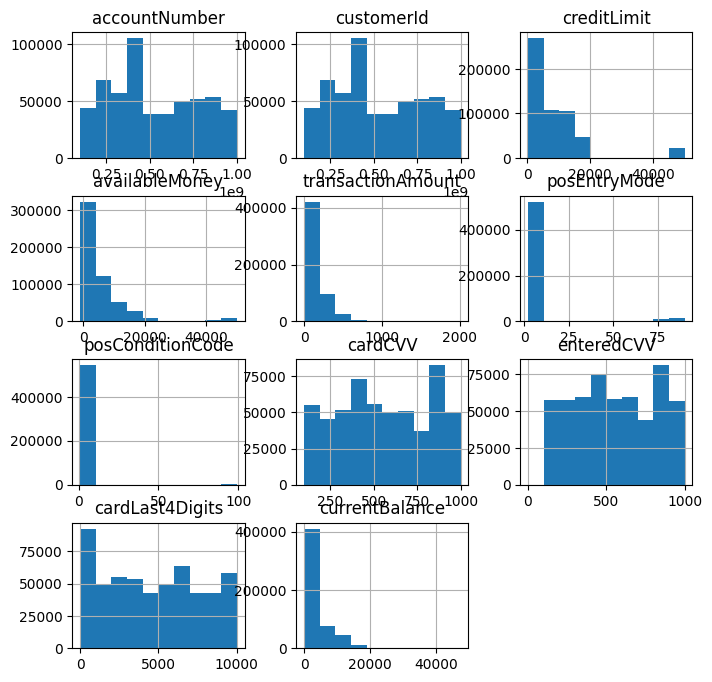

In [12]:
plt.figure()
data.hist(figsize=(8,8))
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_22520\917195902.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = data.corr(method='pearson')


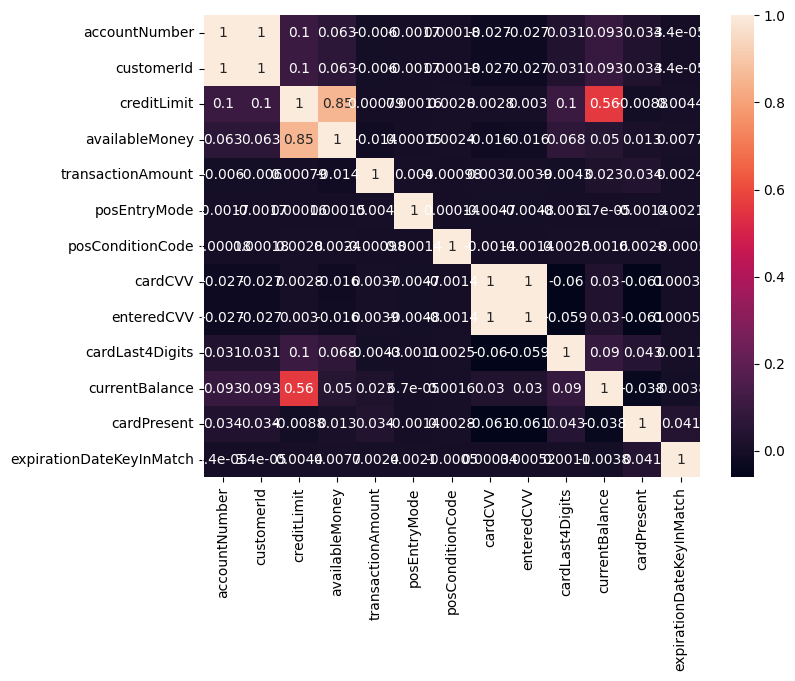

In [13]:
corr_df = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Distribution of Trues and Falses in the data

In [14]:
def count(lst):
    return sum(bool(x) for x in lst)
 
# Driver code
print(count(y))
print(count(y)/len(y))

8663
0.015737975336632442


1.5737975336632442


<AxesSubplot: title={'center': 'True/False relation'}>

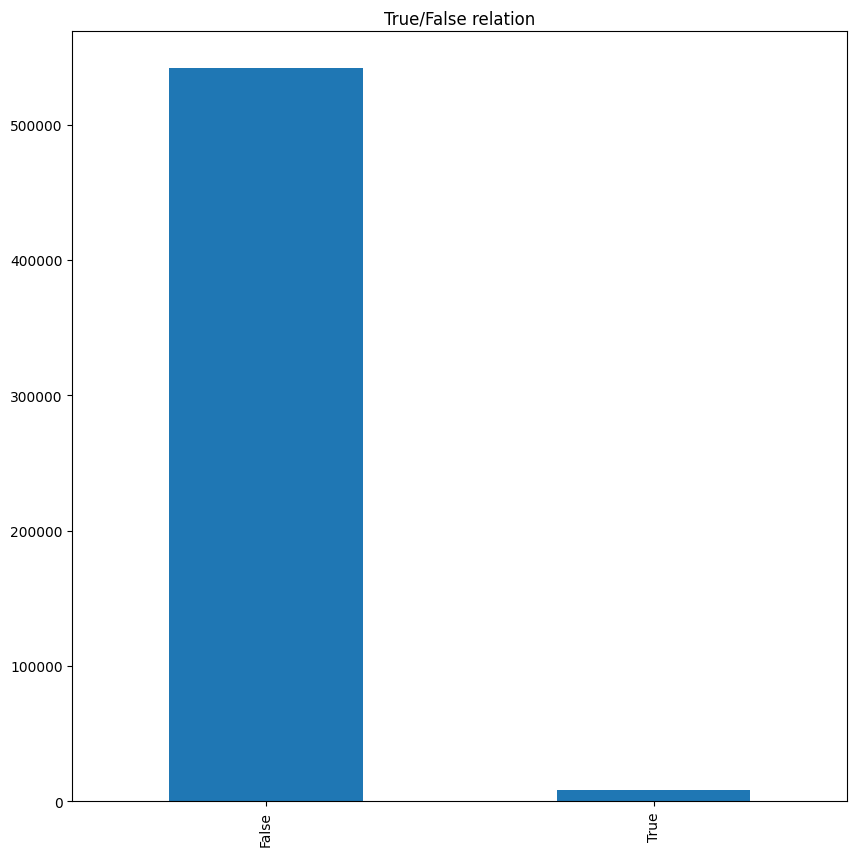

In [15]:
def count(lst):
    return sum(bool(x) for x in lst)

print((count(y)/len(y))*100)

fig = plt.figure(figsize=(10,10))
y.value_counts().plot(kind='bar', title='True/False relation')

In [16]:
print(data.dtypes)

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionAmount           float64
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
dtype: object


## Pipelines to clean the data

### Numeric Pipeline

In [17]:
numeric_pipeline = Pipeline([
                            ('Imputador', SimpleImputer(strategy="most_frequent")),
                            ('std_scaler', StandardScaler()),
                        ])

posEntryMode and posConditionCode are the only numeric values that have NAs, and because those are discrete variables the only imputer strategy valid is Mode, aka "Most_frequent"

In [18]:
numerical = numeric_pipeline.fit_transform(data.select_dtypes(include='number'))
numerical[0,:]

array([ 0.85771371,  0.85771371, -0.48539984, -0.10241399, -0.25962069,
       -0.42006025, -0.23187759, -0.54377154, -0.54244829, -0.93611383,
       -0.76895861])

### Categoric Pipeline

In [19]:
categoric_pipeline = Pipeline([
                        ('Imputador', SimpleImputer(strategy="most_frequent")),
                        ('ohe', OneHotEncoder())
                        ])

Testing the pipeline. Categoricas contains the raw columns, categorical contains the processed data

In [20]:
categoricas = data[["acqCountry", "merchantCountryCode", "merchantCategoryCode", "transactionType", "cardPresent", "expirationDateKeyInMatch"]]
categorical = categoric_pipeline.fit_transform(categoricas.values)
categorical.toarray()[0,:]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.])

### Full pipeline

- Date columns are string but I can't send them in the categorical pipeline because isn't useful to me
- I need to pick specific string columns in order to clean correctly the data

In [21]:
numerical_attributes = data.select_dtypes(include='number').columns 
categorical_attributes = data.select_dtypes(exclude='number').columns 

full_cleaning_pipeline = ColumnTransformer([
        ("numerics", numeric_pipeline, numerical_attributes),
        ("categorics", categoric_pipeline, categorical_attributes)
    ])

In [22]:
full_cleaning_pipeline.fit(data)
ready_Xtrain = full_cleaning_pipeline.transform(X_train)
ready_Xtest = full_cleaning_pipeline.transform(X_test)

print(ready_Xtrain.shape)
print(ready_Xtest.shape)

(385316, 45)
(165136, 45)


## Model

In [23]:
predictor_pipeline = Pipeline([
        ("data_preparation", full_cleaning_pipeline),
        ("DTC", DecisionTreeClassifier(random_state=10000))
    ])

predictor_pipeline.fit(X_train, y_train)
predicted_vals = predictor_pipeline.predict(X_test)

print('DecisionTreeClassifier:\n')
print('F1: {0}'.format(f1_score(y_test,predicted_vals,average='weighted')))
print('Precision Score: {0}'.format(precision_score(y_test,predicted_vals,average='weighted')))
print('Recall Score: {0}'.format(recall_score(y_test,predicted_vals, average='weighted')))
cm = confusion_matrix(y_test,predicted_vals)

DecisionTreeClassifier:

F1: 0.9701786161095085
Precision Score: 0.9716639214206332
Recall Score: 0.9687166941187869


<AxesSubplot: >

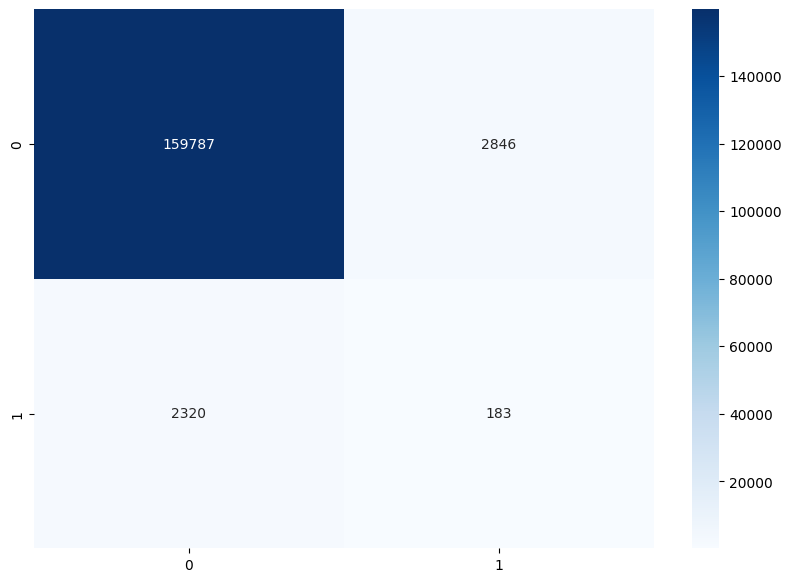

In [24]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

## Saving model pipeline
- Using datat (Test dataset) to predict the isFraud variable
- Because I uploaded the answers to Kaggle, I need to merge the ID's of the transactions and the transactions result

In [25]:
DT_model = predictor_pipeline
joblib.dump(DT_model, "FraudModel.pkl")
FraudModel = joblib.load("FraudModel.pkl")
isFraud = FraudModel.predict(datat)
solutions = pd.concat([id, pd.DataFrame(isFraud)], axis=1)
solutions.to_csv('solutions.csv')